# Chi-Square Distribution

---

## Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statistics
from scipy import stats

%matplotlib inline
plt.style.use("fivethirtyeight")

---

## Utilities

In [2]:
def get_bins(xmin, xmax, step = 1):
    bins = np.arange(xmin, xmax, step)
    bins = bins if len(bins) > 2 else get_bins(xmin, xmax + 1, step)
    return bins if len(bins) <= 100 \
        else get_bins(xmin, xmax, step = step + 1)

In [3]:
def get_continuous_ticks(xmin, xmax):
    cuts = [5, 10, 20, 50, 100, 200, 500, 1000]
    ticks = np.arange(int(np.floor(xmin)), int(np.ceil(xmax)) + 1)
    if len(ticks) > 15:
        for cut in cuts:
            ticks = [tick for tick in ticks if tick % cut == 0]
            if len(ticks) <= 15:
                return ticks
        return ticks
    return ticks

In [4]:
def plot_continuous_distribution(f, x_axis, obs = None, q = None, **kwargs):
    pdf = f.pdf(x_axis, **kwargs)
    
    fig, ax = plt.subplots(figsize = (8, 4))
    ax.plot(x_axis, pdf, alpha = 0.7, color = "k")
    ax.fill_between(x_axis, pdf, alpha = 0.4)
    
    print(f"Mean: {f.mean(**kwargs)}")
    print(f"Median: {f.median(**kwargs)}")
    print(f"Variance: {f.var(**kwargs)}")
    print(f"Standard Deviation: {f.std(**kwargs)}")
    
    plt.xticks(get_continuous_ticks(xmin = x_axis.min(), xmax = x_axis.max()))
    plt.show()

In [5]:
def sample_continuous_distribution(f, size = 1, seed = None, **kwargs):
    sample = f.rvs(size = size, random_state = seed, **kwargs)
    
    print(f"Min: {np.min(sample)}")
    print(f"Mean: {np.mean(sample)}")
    print(f"Median: {np.median(sample)}")
    print(f"Max: {np.max(sample)}")
    print(f"Variance: {np.var(sample, ddof = 0)}")
    print(f"Standard Deviation: {np.std(sample, ddof = 0)}")
    
    fig, ax = plt.subplots(figsize = (8, 4))
   
    plt.hist(x = sample,
             density = True,
             edgecolor = "k",
             bins = get_bins(sample.min(), sample.max() + 1),
             linewidth = 2)

    plt.xticks(get_continuous_ticks(sample.min(), sample.max()))
    plt.show()
    return sample

---

La *chi-square* fa parte delle *sampling distributions*, cioè delle distribuzioni teoriche che sono state costruite come supporto ai processi inferenziali.

La *chi-square distribution* è utilizzata per studiare le differenze fra gli *expected counts* e gli *observed counts* di una variabile categorica.

Ha un solo parametro $-$ i *degrees of freedom* $-$ che ne influenzano il centro, l'andamento e lo spread. Il valore dei *df* di una *chi-square* va sempre fissato al numero di livelli della categorica analizzata meno uno.

$$\large df=k-1$$

La *PDF* della *chi-square distribution* è:

$$\large f(x)=\frac{x^{\frac{n}{2}-1}\cdot e^{-\frac{x}{2}}}
{\Gamma(\frac{n}{2})\cdot 2^{\frac{n}{2}}}$$

Ricordiamo la definizione della *Gamma function*: $\Gamma(n)=(n-1)!$

La distribuzione $\chi^2$ non è simmetrica, e può *realizzare* solo valori maggiori o uguali a zero. Il suo parametro *degrees of freedom* ne specifica la forma.

L'**expectation** della chi-square coincide col valore dei suoi *degrees of freedom*:

$$\large X\sim\chi^2_{df=1}\rightarrow E(X)=1$$

La **variance** della chi-square coincide col doppio dei suoi *degrees of freedom*:

$$\large X\sim\chi^2_{df=1}\rightarrow Var(X)=2$$

---

La chi-square è correlata alla normale: se una certa variabile $X$ segue andamento normale, allora il suo quadrato $X^2$ segue l'andamento della chi-square quando c'è solo un grado di libertà.

Mean: 1.0
Median: 0.454936423119572
Variance: 2.0
Standard Deviation: 1.4142135623730951


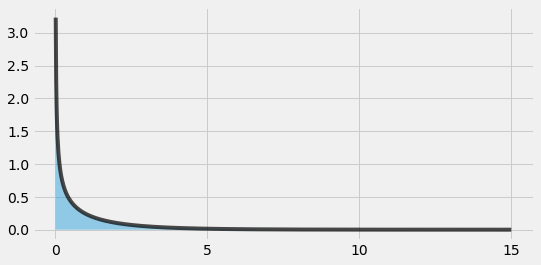

In [6]:
df = 1

x_axis = np.linspace(0, 15, 1000)

plot_continuous_distribution(f = stats.chi2,
                             x_axis = x_axis,
                             df = df)

La relazione fra la chi-square e la normale prosegue: consideriamo $n$ variabili aleatorie *iid* $X_1,\dots,X_n$, tutte che seguono l'andamento della *standard normal*.

$$\large X_i\sim N(0, 1)$$

Si dice che la somma dei quadrati di queste variabili aleatorie sia anch'essa una variabile aleatoria e segua l'andamento della *chi-square distribution*, con un numero di *degrees of freedom* pari ad $n$.

$$\large X_1^2+\dots X_n^2\sim\chi^2_{df=n}$$

---

#### Probability Density Function

Mean: 2.0
Median: 1.386294361119891
Variance: 4.0
Standard Deviation: 2.0


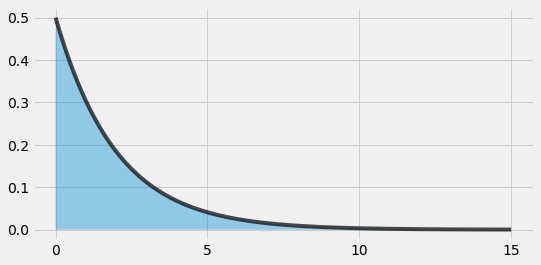

In [7]:
df = 2

x_axis = np.linspace(0, 15, 1000)

plot_continuous_distribution(f = stats.chi2,
                             x_axis = x_axis,
                             df = df)

Mean: 3.0
Median: 2.3659738843753377
Variance: 6.0
Standard Deviation: 2.449489742783178


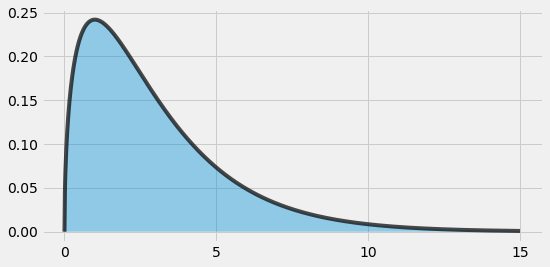

In [8]:
df = 3

x_axis = np.linspace(0, 15, 1000)

plot_continuous_distribution(f = stats.chi2,
                             x_axis = x_axis,
                             df = df)

Mean: 5.0
Median: 4.351460191095526
Variance: 10.0
Standard Deviation: 3.1622776601683795


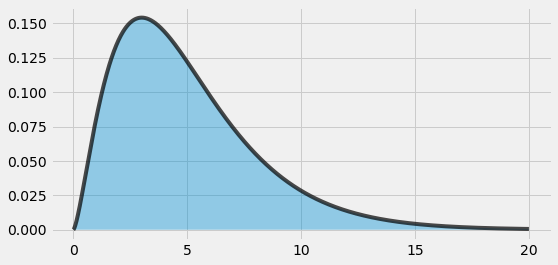

In [9]:
df = 5

x_axis = np.linspace(0, 20, 1000)

plot_continuous_distribution(f = stats.chi2,
                             x_axis = x_axis,
                             df = df)

---

#### RVS

Min: 0.23765739166278138
Mean: 4.929182187174212
Median: 4.208149931747328
Max: 23.290648995026544
Variance: 9.792903804047421
Standard Deviation: 3.1293615649278084


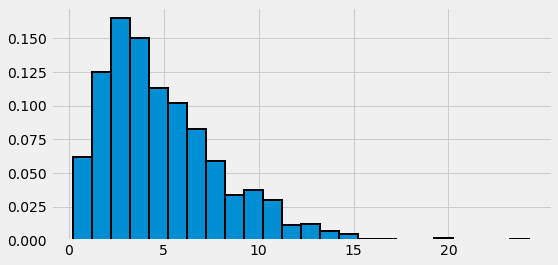

In [10]:
df = 5

sample = sample_continuous_distribution(f = stats.chi2,
                                        size = 1000,
                                        df = df)

---

Per *df* bassi la chi-square presenta un picco iniziale e una forte *skewness* destra, mentre all'aumentare dei *df* tende ad aumentare la sua simmetria e ad avvicinarsi all'andamento normale. Questo succede anche perché la media/aspettazione è proprio pari al numero di *df*.

---